# ARIMA

ARIMA (AutoRegressive Integrated Moving Average) is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

### AR ( Autoregression ) 
- Relationship between present observations with past observations
> * p = lag observations ( lag order )

### I ( Integrrated ) d
- Differencing of raw obsevations ( Make the time series stationary )
> * d = degree of differencing 

### MA ( Moving Average ) q
- How wrong the last time period was to predict the correct next period
> * q = order of moving average

# Notes

## Time series
- a series of data points ordered in time
- Time is considered independent variable ( forecast the future )
> * Is it stationary?
> * Is there a seasonality?
> * Is the target (what we are trying to predict ) autocorrelated?

## Seasonality 
- Periodic fluctuations ( affected by seasonal factors )
- can also be derived from Autocorrelation ACF plot

## Stationarity

- For ARIMA model to work, data needs to be stationary
	- Mean is constant ( should not go away from the axis over time )
	- Standard deviation (sigma) is constant ( Fluctuating the same amount )
    - Covariance is independent of time
    - No seasonality ( Periodically behaviour )
    
- Stationarity x White noise
	- Condition is similar, but mean = 0
    - White noise is Stationary.

## Correlation
- Fit the line and check for errors 
- How closely the datapoints are off the line
- High correlated = data points are very close to the line

- Correlation between current price and last days prices

## Autocorrelation
- it takes into consideration the correlation of the time series with itself
- It starts at 1, and data points should center in the autocorrelation plot

- Direct route between prices ( last month to today ) and Indirect route ( day by day )
- Pearson correlation

- ACF: Tells correlation between directly

## Partial autocorrelation
- Error residuals that are not fit yet ( errors = deviations from the correlation )
- Fit each day leftover error and pass residuals to next day to be fit
- It takes previous days prices to estimate next days errors

- Only cares about direct route/effect

- PACF: What is the direct effect of price between months ago and today

# Dataset

## Yahoo Finance

* Yahoo provides an API that can be easily integrated with python to return a dataframe containing Daily prices for bitcoin since 2014.
> The good thing about using such dataset is that very little preparation needs to be done:
>* there are no missing values
>* the date is already indexed. 


In [1]:
# pip install yfinance
# Yahoo API to fetch up to date bitcoin data from 2014 until present (DAILY)
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima.arima import auto_arima

# Data Import and Exploration

In [2]:
df = yf.download('BTC-USD')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-03-26,44349.859375,44735.996094,44166.273438,44500.828125,44500.828125,16950455995
2022-03-27,44505.355469,46827.546875,44437.292969,46820.492188,46820.492188,28160889722
2022-03-28,46821.851562,48086.835938,46690.203125,47128.003906,47128.003906,36362175703


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2752 entries, 2014-09-17 to 2022-03-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2752 non-null   float64
 1   High       2752 non-null   float64
 2   Low        2752 non-null   float64
 3   Close      2752 non-null   float64
 4   Adj Close  2752 non-null   float64
 5   Volume     2752 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 150.5 KB


In [4]:
df['Close'].describe()

count     2752.000000
mean     11746.374902
std      16383.150358
min        178.102997
25%        609.611496
50%       6382.234619
75%      10776.427246
max      67566.828125
Name: Close, dtype: float64

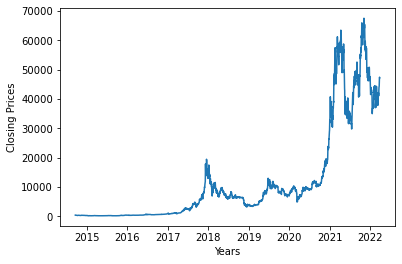

In [5]:
plt.plot(df.index, df['Close'])

plt.xlabel('Years')
plt.ylabel('Closing Prices')
plt.show()

## Resample

( Testing purposes )

- If need to convert for monthly samples
- It might show different results when dealing with less data points

> Resampling the data from daily to monthly will reduce data points from 2700 to 90

In [6]:
# Resample test

dfm = df["Close"].resample("MS").sum()

dfm

Date
2014-09-01    5.700554e+03
2014-10-01    1.128862e+04
2014-11-01    1.098299e+04
2014-12-01    1.057930e+04
2015-01-01    7.712259e+03
                  ...     
2021-11-01    1.818645e+06
2021-12-01    1.527159e+06
2022-01-01    1.274547e+06
2022-02-01    1.141377e+06
2022-03-01    1.255603e+06
Freq: MS, Name: Close, Length: 91, dtype: float64

## Seasonal Decomposition Plot

This module creates subplots of trend, seasonality and residuals

* Trend: Slope of the graph ( Increasing? decreasing? )
* Seasonality: Can we observe any cycles?
* Residuals: Difference between an observation and its predicted value at each time stamp

In [7]:
import statsmodels.api as sm

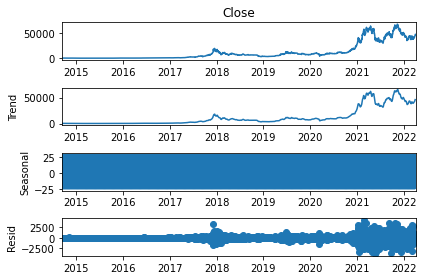

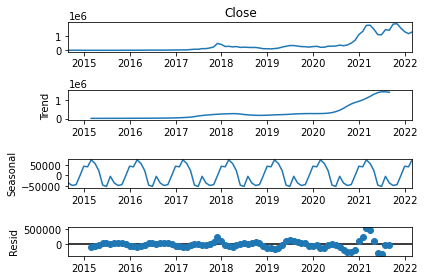

In [8]:
decomposition = sm.tsa.seasonal_decompose(df.Close, model="additive")
decomp_month = sm.tsa.seasonal_decompose(dfm, model="additive")

fig = decomposition.plot()
fig = decomp_month.plot()
plt.show()

- First graph uses daily dataframe (2700 rows )
- Second graph ( Below ) uses monthly dataframe (  90 rows )

## Check Stationarity ( ADF Test )
- If p-value < 0.05 = Stationary
- If p-value > 0.05 = Non stationary ( Differencing needed )

In [9]:
# Check if price series is stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -0.809236335049766
p-value: 0.8163938967384842


p-value = 0.81 = non stationary

## AutoCorrelation Function ( ACF )

Autocorrelation Function can be used to find the best "q" parameter

#### q

q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

We can look at the ACF plot for the number of MA terms.

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

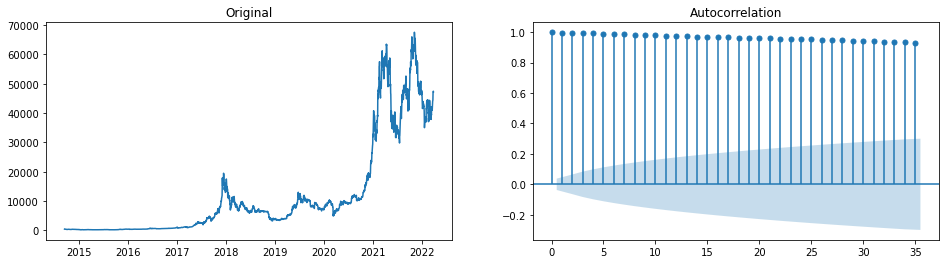

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df.Close)
ax1.set_title("Original")
# add ; at the end of the plot function so that the plot is not duplicated
plot_acf(df.Close, ax=ax2);

## Differencing

Subtracting periodical values

* Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

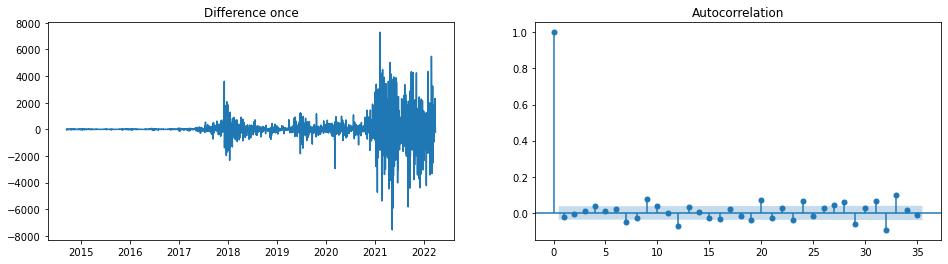

In [12]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

## Differencing twice

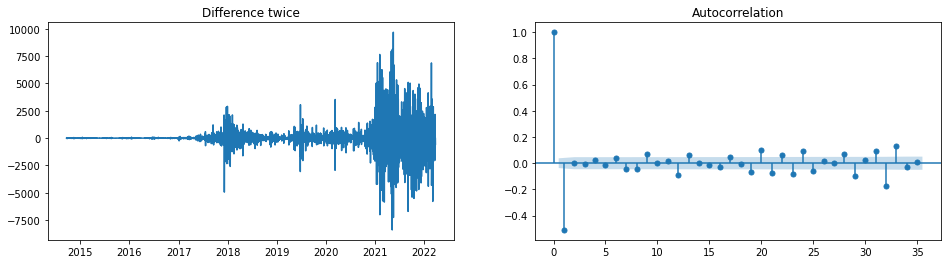

In [13]:
diff = df.Close.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference twice")
plot_acf(diff, ax=ax2);

## Number of differencing
We can use the pmdarima package to get the number of differencing.

In [14]:
#!pipenv install --skip-lock pmdarima

from pmdarima.arima.utils import ndiffs

In [15]:
ndiffs(df.Close, test="adf")

1

## Partial Autocorrelation Function ( PACF )

- this can be used to find the best value for p

#### p

p is the order of the Auto Regressive (AR) term. It refers to the number of lags to be used as predictors. 

>The partial autocorrelation represents the correlation between the series and its lags. 

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf

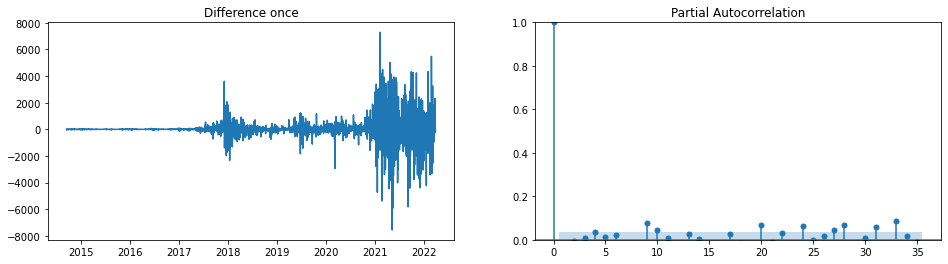

In [17]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

# AUTO ARIMA

An ARIMA model is characterized by 3 terms (p, d, q):

p is the order of the AR term

d is the number of differencing required to make the time series stationary

q is the order of the MA term

## We can use auto_arima to help finding the values that best fits p,d and q

In [18]:
model = auto_arima(
    df['Adj Close'],
    start_p=1,
    start_q=1,
    test="adf",
    max_p=6,
    max_q=6,
    m=1,  # frequency of series
    d=None,  # determine 'd'
    seasonal=False,  # no seasonality
    trace=True,
    stepwise=True,
)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=44519.678, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=44517.133, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=44517.689, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=44517.682, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=44516.410, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.398 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2752
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -22257.205
Date:                Wed, 30 Mar 2022   AIC                          44516.410
Time:                        13:50:23   BIC                          44522.330
Sample:                             0   HQIC                         44518.549
                               - 2752                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.234e+05   5240.483    118.957      0.000    6.13e+05    6.34e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.45   Jarque-Bera (JB):             39606.91
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):            5397.77   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 0,1,0 are the recommended parameters

==Ask Muhammad about next topics: ==
- Random Walk?
- Uncorrelated random variables?
- white noise?



## Split train/test

> Now we need to split the dataset in training and testing lists
>* first we find which row corresponds to 90% of the entries
>* training_data takes the first 90% of the Closing Prices
>* Testing_data contains the last 10% of Closing prices

In [19]:
to_row = int(len(df)*0.9)
training_data = list(df[0:to_row]['Close'])
testing_data = list(df[to_row:]['Close'])

# Plot to graphically represents dataset division

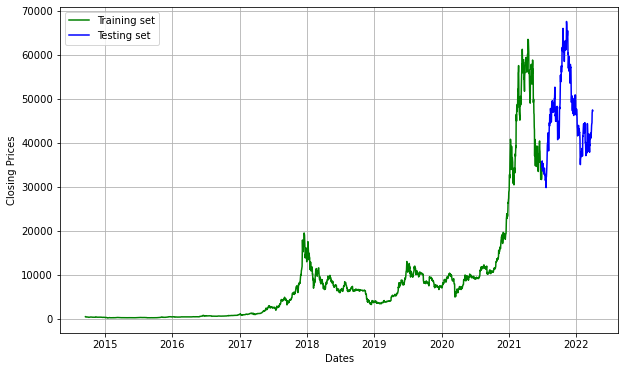

In [20]:
plt.figure(figsize = (10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Close'], 'green', label = 'Training set')
plt.plot(df[to_row:]['Close'], 'blue', label = 'Testing set')
plt.legend()

Empty list is needed in order to store the daily prediction for our testing set as we are going to iterate day by day from where we split the dataset

In [21]:
model_predictions = []
n_test_obser = len(testing_data)

## Fitting ARIMA model

(0,1,0)

for loop to run iterations and update data through all observations in testing dataset to improve accuracy

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
for i in range(n_test_obser):
    # model parameters fitting
    model = ARIMA(training_data, order = (1,1,1))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    
    # yhat = represents the predicted value
    yhat = list(output[0])[0]
    # append the prediction
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    
    #update the training set for next iterations
    training_data.append(actual_test_value)
    


In [24]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2750
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -22248.204
Method:                       css-mle   S.D. of innovations            789.435
Date:                Wed, 30 Mar 2022   AIC                          44504.408
Time:                        13:52:17   BIC                          44528.086
Sample:                             1   HQIC                         44512.963
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0938     14.689      1.164      0.245     -11.696      45.883
ar.L1.D.y      0.0525      0.508      0.103      0.918      -0.942       1.047
ma.L1.D.y     -0.0754      0.507     -0.149      0.8

## Residual errors

(array([2.45276329e-07, 9.81105318e-07, 4.16969760e-06, 1.20185401e-05,
        1.04732993e-04, 5.28079937e-04, 1.76598957e-05, 5.15080292e-06,
        1.22638165e-06, 2.45276329e-07]),
 array([-7556.30969598, -6073.7517804 , -4591.19386481, -3108.63594923,
        -1626.07803365,  -143.52011806,  1339.03779752,  2821.5957131 ,
         4304.15362869,  5786.71154427,  7269.26945986]),
 <BarContainer object of 10 artists>)

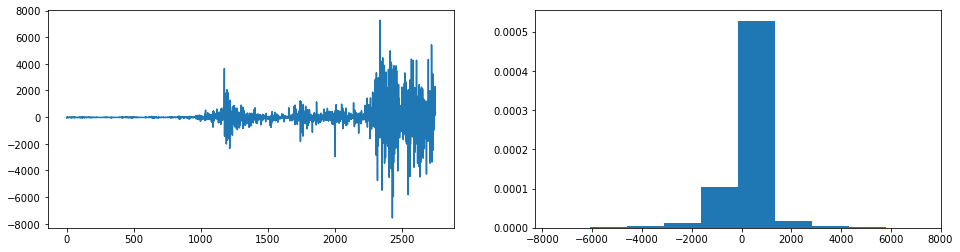

In [25]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(residuals)
ax2.hist(residuals, density=True)


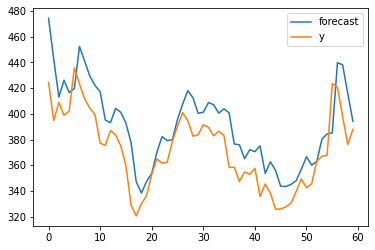

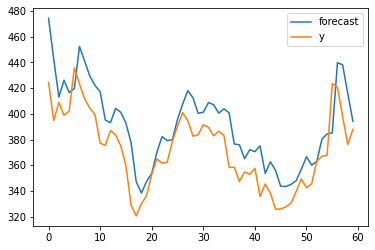

In [26]:
# Actual vs Fitted
model_fit.plot_predict(
    start=1, end=60, dynamic=False,
)

## Plot predicted x actual

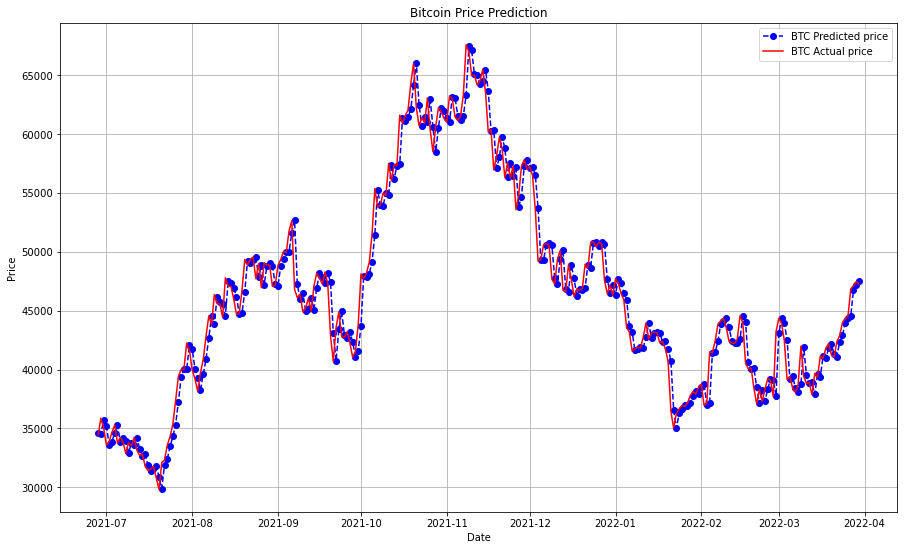

In [27]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df[to_row:].index

plt.plot(date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'BTC Predicted price')
plt.plot(date_range, testing_data, color = 'red', label = 'BTC Actual price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# MAPE

The mean absolute percentage error (MAPE), also known as mean absolute percentage deviation (MAPD), is a measure of prediction accuracy of a forecasting method in statistics.

In [28]:
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data))/np.abs(testing_data))
print('MAPE: ' +str(mape))

MAPE: 0.025471802853786384


MAPE = 2.5% error. which implies almost 98% accuracy.

## AIC ( Alkaline Information Criteria )

How to apply?